Persistent entropy = persistence barcode + Shanon's entropy

In [3]:
import numpy as np
import gudhi as gd
import gudhi.representations
import matplotlib.pyplot as plt
import random
np.random.seed(69)

In [4]:
# Create 2 clouds of points, one uniform, one normal

normal_cloud = []
uniform_cloud = []

no_points = 200

for _ in range(no_points):
    normal_cloud.append(np.random.normal(size= [no_points, 2]))
    uniform_cloud.append(np.random.uniform(size = [no_points, 2], low = -3, high = 3))

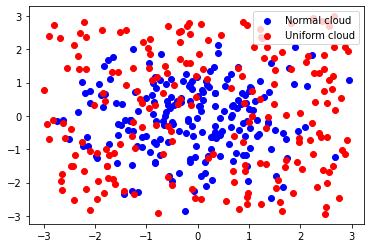

In [11]:
fig, ax = plt.subplots()
# Show the first cloud
ax.scatter(normal_cloud[0][:, 0], normal_cloud[0][:, 1], marker="o", color = "b", label="Normal cloud")
ax.scatter(uniform_cloud[0][:, 0], uniform_cloud[0][:, 1], marker="o", color = "r", label="Uniform cloud")
ax.legend(loc="best")
plt.show()

In [13]:
dgm_normal = []
for cloud in normal_cloud:
    rips_complex = gd.RipsComplex(points = cloud).create_simplex_tree(max_dimension=1)
    rips_complex.compute_persistence()
    dgm_normal.append(rips_complex.persistence_intervals_in_dimension(0))
    
dgm_uniform = []
for cloud in uniform_cloud:
    rips_complex = gd.RipsComplex(points = cloud).create_simplex_tree(max_dimension=1)
    rips_complex.compute_persistence()
    dgm_uniform.append(rips_complex.persistence_intervals_in_dimension(0))

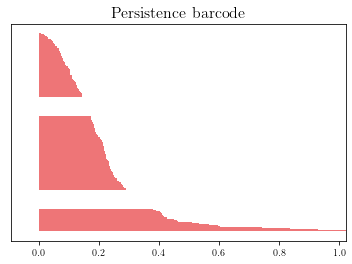

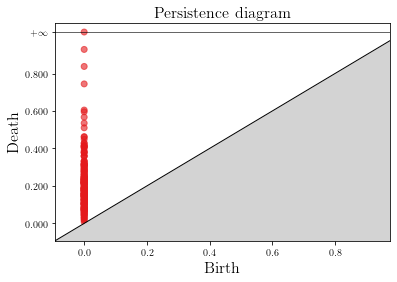

In [17]:
gd.plot_persistence_barcode(dgm_normal[0])
gd.plot_persistence_diagram(dgm_normal[0])
plt.show()

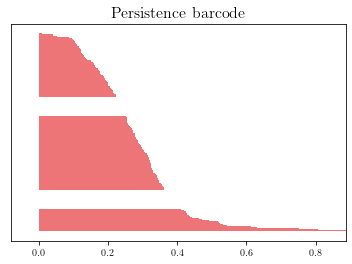

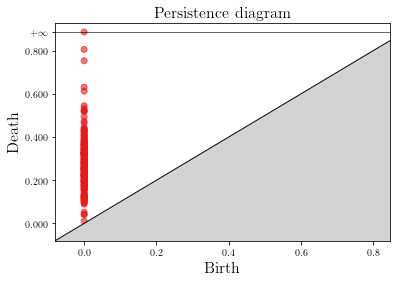

In [18]:
gd.plot_persistence_barcode(dgm_uniform[0])
gd.plot_persistence_diagram(dgm_uniform[0])
plt.show()

In [20]:
# Remove infinity
dgm_normal = list(map(lambda barcode: np.array([bars for bars in barcode if bars[1]!=np.inf]), dgm_normal))
dgm_uniform = list(map(lambda barcode: np.array([bars for bars in barcode if bars[1]!=np.inf]), dgm_uniform))

In [23]:
persistence_entropy = gd.representations.Entropy()
pe_normal = persistence_entropy.fit_transform(dgm_normal)

In [24]:
pe_uniform = persistence_entropy.fit_transform(dgm_uniform)

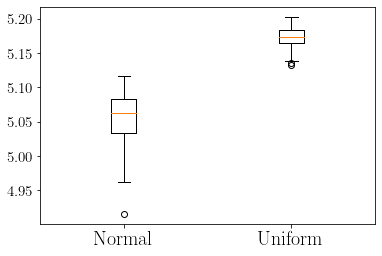

In [30]:
pe_normal_arr = np.array(pe_normal[:,0])
pe_uniform_arr = np.array(pe_uniform[:,0])

fig, ax = plt.subplots()

#Box plot
bp = ax.boxplot([pe_normal_arr, pe_uniform_arr], labels=["Normal", "Uniform"])

plt.show()

In [35]:
dgm_normal = []
for cloud in normal_cloud:
    rips_complex = gd.RipsComplex(points = cloud).create_simplex_tree(max_dimension=1)
    rips_complex.compute_persistence()
    dgm_normal.append(rips_complex.persistence_intervals_in_dimension(0))
    
dgm_uniform = []
for cloud in uniform_cloud:
    rips_complex = gd.RipsComplex(points = cloud).create_simplex_tree(max_dimension=1)
    rips_complex.compute_persistence()
    dgm_uniform.append(rips_complex.persistence_intervals_in_dimension(0))

In [39]:
betti_curve = gd.representations.BettiCurve()
bc_normal = betti_curve.fit_transform(dgm_normal)
bc_uniform = betti_curve.fit_transform(dgm_uniform)

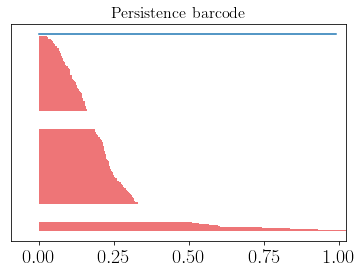

In [43]:
x_seq = np.array(range(100))/100
gd.plot_persistence_barcode(dgm_normal[0])
# plt.plot(x_seq, bc_normal[0])
plt.show()

In [ ]:
es = gd.representations.Entropy(mode='vector', resolution = )